['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


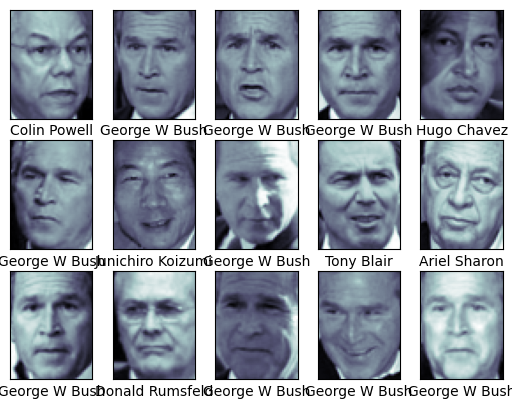

(1011, 2914) (1011,)
{'svc__C': 5, 'svc__gamma': 0.001}


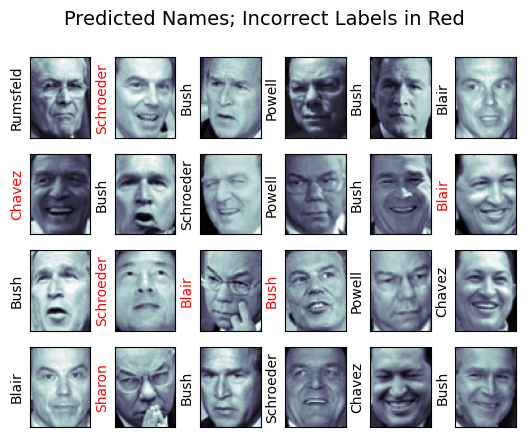

                   precision    recall  f1-score   support

     Ariel Sharon       0.60      0.56      0.58        16
     Colin Powell       0.80      0.83      0.82        54
  Donald Rumsfeld       0.78      0.85      0.82        34
    George W Bush       0.94      0.89      0.91       136
Gerhard Schroeder       0.68      0.85      0.75        27
      Hugo Chavez       0.81      0.72      0.76        18
Junichiro Koizumi       0.87      0.87      0.87        15
       Tony Blair       0.83      0.78      0.81        37

         accuracy                           0.84       337
        macro avg       0.79      0.80      0.79       337
     weighted avg       0.84      0.84      0.84       337



In [10]:
#基于支持向量机的人脸识别方法
from sklearn.datasets import fetch_lfw_people    # 直接调用sklearn的人脸照片数据集
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV #自动寻找最优参数
from sklearn.metrics import classification_report

faces = fetch_lfw_people(min_faces_per_person=60) # 只识别最少有60张照片的人的人脸
print(faces.target_names)  #输出符合条件的人的姓名
print(faces.images.shape)  #输出照片尺寸
fig, ax = plt.subplots(3,5)  #以3行5列的形式显示照片
for i,axi in enumerate(ax.flat):
  axi.imshow(faces.images[i],cmap = 'bone')
  axi.set(xticks=[],yticks=[],xlabel=faces.target_names[faces.target[i]])
plt.show()
 
pca = PCA(n_components=150,whiten=True, random_state=42) #PCA降维，维数降到150
svc = SVC(kernel='rbf',class_weight='balanced')  # 使用rbf核函数
model = make_pipeline(pca, svc)	#流水线处理，先降维，再SVC分类
 
Xtrain, Xtest,ytrain,ytest = train_test_split(faces.data, faces.target, random_state=40)
param_grid = {'svc__C': [1, 5, 10], 'svc__gamma': [0.0001, 0.0005, 0.001]}
grid = GridSearchCV(model, param_grid)
print(Xtrain.shape, ytrain.shape) #特征集1011行，2914列，标签集1011行
grid.fit(Xtrain, ytrain)  #建立模型
print(grid.best_params_)  #输出模型的最优参数组合
 
model = grid.best_estimator_  #获得最好的模型
yfit = model.predict(Xtest)  #用当前最好的模型做预测
fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone') 	#每个图像大小是62*47
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color='black' if yfit[i] == ytest[i] else 'red')
plt.suptitle('Predicted Names; Incorrect Labels in Red', size=14)
plt.show()

print(classification_report(ytest, yfit, target_names=faces.target_names))

['Beakhyun' 'Bill' 'Me']
(60, 50, 50)


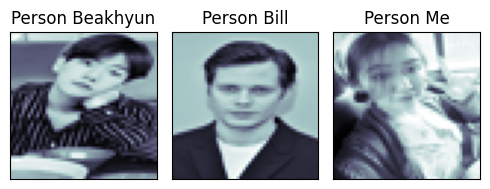

(60, 2500) (60,)
(12, 2500)


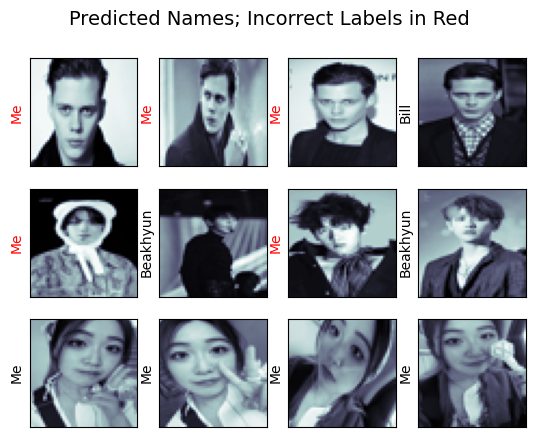

              precision    recall  f1-score   support

    Beakhyun       1.00      0.50      0.67         4
        Bill       1.00      0.25      0.40         4
          Me       0.44      1.00      0.62         4

    accuracy                           0.58        12
   macro avg       0.81      0.58      0.56        12
weighted avg       0.81      0.58      0.56        12



In [12]:
import matplotlib.pyplot as plt #调用我自己的数据集
import os
from PIL import Image
import numpy as np
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report

# 数据集路径
data_dir1 = 'E:/桌面/机器学习/期末实验/MyImage/train'
data_dir2 = 'E:/桌面/机器学习/期末实验/MyImage/test'

# 加载图像数据
def load_images_from_folder(folder, img_size=(50, 50)):
    images = []
    labels = []
    for label in os.listdir(folder):
        label_folder = os.path.join(folder, label)
        if os.path.isdir(label_folder):
            for filename in os.listdir(label_folder):
                img = Image.open(os.path.join(label_folder, filename))
                if img is not None:
                    img = img.convert('L')  # 转换为灰度图
                    img = img.resize(img_size)  # 调整图像尺寸
                    images.append(np.array(img))
                    labels.append(label)
    return np.array(images), np.array(labels)
# 训练集和测试集
X_train,y_train = load_images_from_folder(data_dir1,img_size=(50, 50))
X_test,y_test = load_images_from_folder(data_dir2,img_size=(50, 50))
# 创建目标名称列表
target_names = np.unique(y_train)
print(target_names)  #人的姓名
print(X_train.shape)  #输出照片尺寸
# # 显示照片
fig, axs = plt.subplots(1, 3, figsize=(5, 3))

# 遍历每个子文件夹
for i, folder in enumerate(target_names):
    # 获取当前文件夹中所有照片的索引
    indices = np.where(y_train == folder)[0]
    
    # 确保每个子文件夹中至少有一个人物
    if len(indices) == 0:
        continue

    # 遍历子文件夹中的每个人物
    for j, index in enumerate(indices):
        axs[i].imshow(X_train[index], cmap='bone')
        axs[i].set_title(f'Person {folder}')
        axs[i].set_xticks([])
        axs[i].set_yticks([])
        #axs[i].set_xlabel(f'Person {folder}, Image {j+1}')

# 显示图像
plt.tight_layout()
plt.show()

# 对于灰度图像，channels = 1
n_samples = X_train.shape[0]
height = X_train.shape[1]
width = X_train.shape[2]
# 将3D图像数组展平为2D数组
reX_train = X_train.reshape(n_samples, height * width )

# 创建模型
# 定义PCA的参数
n_components = min(reX_train.shape[0], reX_train.shape[1])  # 取n_samples和n_features中的较小值
pca = PCA(n_components=n_components, whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)
# param_grid = {'svc__C': [1, 5, 10], 'svc__gamma': [0.0001, 0.0005, 0.001]}
# grid = GridSearchCV(model, param_grid)
# grid.fit(reX_train, y_train)  #建立模型
# print(grid.best_params_)  #输出模型的最优参数组合
# model = grid.best_estimator_  #获得最好的模型
# # 训练模型
model.fit(reX_train, y_train)
print(reX_train.shape, y_train.shape)  
# # 预测测试集
# 对于灰度图像，channels = 1
n_samples = X_test.shape[0]
height = X_test.shape[1]
width = X_test.shape[2]
# 将3D图像数组展平为2D数组
reX_test = X_test.reshape(n_samples, height * width )
y_pred = model.predict(reX_test)
print(reX_test.shape)
# 显示预测结果
fig, ax = plt.subplots(3, 4)
for i, axi in enumerate(ax.flat):
    axi.imshow(reX_test[i].reshape(50, 50), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(y_pred[i].split()[-1],
                   color='black' if y_pred[i] == y_test[i] else 'red')
plt.suptitle('Predicted Names; Incorrect Labels in Red', size=14)
plt.show()

# 打印分类报告
print(classification_report(y_test, y_pred, target_names=target_names))

In [29]:
#基于卷积神经网络的人脸识别方法
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
import torch.nn as nn
import torch
import torch.utils.data as Data
from torch.autograd import Variable
import numpy as np

BATCH_SIZE = 10
EPOCH = 20 #经过多次调试得出，最佳的迭代次数

lfw_people = fetch_lfw_people(min_faces_per_person=80, resize=1)# 只识别最少有80张照片的人的人脸
images = lfw_people.images / 255.
target_name = lfw_people.target
# 采样，每类80张
a = zip(images, target_name)
image = []
target = []
a0, a1, a2, a3, a4, a5, a6, a7, a8, a9 = 0, 0, 0, 0, 0, 0, 0, 0, 0, 0
for x, y in a:
    if y == 0:
        if a0 <= 80:
            image.append(x)
            target.append(y)
            a0 += 1
    elif y == 1:
        if a1 <= 80:
            image.append(x)
            target.append(y)
            a1 += 1
    elif y == 2:
        if a2 <= 80:
            image.append(x)
            target.append(y)
            a2 += 1
    elif y == 3:
        if a3 <= 80:
            image.append(x)
            target.append(y)
            a3 += 1
    elif y == 4:
        if a4 <= 80:
            image.append(x)
            target.append(y)
            a4 += 1
    elif y == 5:
        if a5 <= 80:
            image.append(x)
            target.append(y)
            a5 += 1
    elif y == 6:
        if a6 <= 80:
            image.append(x)
            target.append(y)
            a6 += 1
    elif y == 7:
        if a7 <= 80:
            image.append(x)
            target.append(y)
            a7 += 1
    elif y == 8:
        if a8 <= 80:
            image.append(x)
            target.append(y)
            a8 += 1
    else:
        if a9 <= 80:
            image.append(x)
            target.append(y)
            a9 += 1
images = np.array(image)
target_name = np.array(target)
# 分测试集、训练集
X_train, X_test, y_train, y_test = train_test_split(images, target_name, train_size=0.8, random_state=42)
X_train, X_test, y_train, y_test = torch.from_numpy(X_train), torch.from_numpy(X_test), \
                                   torch.from_numpy(y_train), torch.from_numpy(y_test)

X_train = torch.unsqueeze(X_train, dim=1).type(torch.FloatTensor)
X_test = torch.unsqueeze(X_test, dim=1).type(torch.FloatTensor)
dataset = Data.TensorDataset(X_train, y_train)
loader = Data.DataLoader(dataset=dataset, batch_size=BATCH_SIZE, shuffle=True)

# CNN网络结构
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.Conv1 = nn.Sequential(
            nn.Conv2d(  # ->(1,125,95)
                in_channels=1,
                out_channels=16,
                kernel_size=(5, 5),
                stride=1,
                padding=2,  # if stride = 1,padding_size = (kernel_size-1)/2
            ),
            nn.BatchNorm2d(num_features=16),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2),
        )
        self.Conv2 = nn.Sequential(
            nn.Conv2d(16, 32, (5, 5), 1, 2),
            nn.BatchNorm2d(num_features=32),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2),
        )
        self.Conv3 = nn.Sequential(
            nn.Conv2d(32, 64, (5, 5), 1, 2),  # ->(16,14,14)
            nn.BatchNorm2d(num_features=64),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2),
        )
        self.Conv4 = nn.Sequential(
            nn.Conv2d(64, 128, (5, 5), 1, 2),  # ->(16,14,14)
            nn.BatchNorm2d(num_features=128),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2),
        )
        self.fc = nn.Sequential(
            nn.Linear(128*7*5, 2048),
            nn.ReLU(inplace=True),
            nn.Linear(2048, 1024),
            nn.ReLU(inplace=True),
            nn.Linear(1024, 512),
            nn.ReLU(inplace=True),
            nn.Linear(512, 10),
        )

    def forward(self, x):
        x = self.Conv1(x)
        x = self.Conv2(x)
        x = self.Conv3(x)
        x = self.Conv4(x)
        x = x.view(x.size(0), -1)
        output = self.fc(x)
        return output


cnn = CNN()
optimizer = torch.optim.Adam(cnn.parameters(), lr=0.001)
loss_function = nn.CrossEntropyLoss()  # 回归问题用MSEloss，分类用CrossEntropyLoss
# 训练模型
for epoch in range(EPOCH):
    for step, (x, y) in enumerate(loader):
        b_x = Variable(x)
        b_y = Variable(y)
        if torch.cuda.is_available():
            b_x = b_x.cuda()
            b_y = b_y.cuda()
            cnn = cnn.cuda()
            X_test = X_test.cuda()
            y_test = y_test.cuda()
        output = cnn(b_x)
        loss = loss_function(output, b_y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # 每个epoch结束时计算准确率
    test_output = cnn(X_test)
    pred_y = torch.max(test_output, 1)[1].data.squeeze()
    accuracy = (pred_y == y_test).sum().float() / y_test.size(0)
    print('Epoch:', epoch, '|train_loss:%.4f' % loss.item(), '|accuracy:', accuracy)
# 保存模型参数
model_path = 'E:/桌面/机器学习/期末实验/My_cnn_model.pth'
torch.save(cnn.state_dict(), model_path)
print(f'Model parameters saved to {model_path}')


Epoch: 0 |train_loss:1.9928 |accuracy: tensor(0.1532)
Epoch: 1 |train_loss:1.6261 |accuracy: tensor(0.2793)
Epoch: 2 |train_loss:2.4139 |accuracy: tensor(0.3153)
Epoch: 3 |train_loss:1.8477 |accuracy: tensor(0.3333)
Epoch: 4 |train_loss:1.0345 |accuracy: tensor(0.3333)
Epoch: 5 |train_loss:0.7932 |accuracy: tensor(0.3784)
Epoch: 6 |train_loss:0.7448 |accuracy: tensor(0.5135)
Epoch: 7 |train_loss:0.4297 |accuracy: tensor(0.4775)
Epoch: 8 |train_loss:1.0228 |accuracy: tensor(0.5676)
Epoch: 9 |train_loss:1.9074 |accuracy: tensor(0.7027)
Epoch: 10 |train_loss:1.2420 |accuracy: tensor(0.7477)
Epoch: 11 |train_loss:0.0068 |accuracy: tensor(0.6757)
Epoch: 12 |train_loss:0.0049 |accuracy: tensor(0.7387)
Epoch: 13 |train_loss:1.0678 |accuracy: tensor(0.8018)
Epoch: 14 |train_loss:0.0070 |accuracy: tensor(0.7838)
Epoch: 15 |train_loss:0.0000 |accuracy: tensor(0.7838)
Epoch: 16 |train_loss:0.0051 |accuracy: tensor(0.7928)
Epoch: 17 |train_loss:0.0069 |accuracy: tensor(0.7658)
Epoch: 18 |train_los

In [1]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from sklearn.metrics import accuracy_score, f1_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from PIL import Image

# 已经保存了训练好的模型参数
model_path = 'E:/桌面/机器学习/期末实验/My_cnn_model.pth'

# 加载模型
model = CNN()
model.load_state_dict(torch.load(model_path))

# 定义一个简单的图像预处理步骤
transform = transforms.Compose([
    transforms.Resize((125, 95)),  # 调整图像大小 注意一定要和cnn第一层的输入相同！
    transforms.Lambda(lambda x: x.convert('L')),  # 转换为灰度图
    transforms.ToTensor(),          # 转换为 PyTorch 张量
    transforms.Normalize([0.5],[0.5])
])

# 加载测试数据
image_folder = 'E:/桌面/机器学习/期末实验/CnnImage'
dataset = datasets.ImageFolder(root=image_folder, transform=transform)
loader = DataLoader(dataset, batch_size=1, shuffle=False)

# 初始化准确率和 F1 值
correct = 0
total = 0
predictions = []
targets = []

# 初始化一个列表来存储预测错误的图像
wrong_predictions = []

# 运行模型
model.eval()  # 设置模型为评估模式
with torch.no_grad():
    for images, labels in loader:
        if torch.cuda.is_available():
            images = images.cuda()
        #print(images.shape)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        predictions.extend(predicted.cpu().numpy())
        targets.extend(labels.cpu().numpy())
        
        # 检查预测是否正确
        if predicted != labels:
            wrong_predictions.append((images, predicted, labels))

# 计算准确率和 F1 值
accuracy = accuracy_score(targets, predictions)
f1 = f1_score(targets, predictions, average='macro')

# 打印结果
print(f'Accuracy: {accuracy:.2f}')
print(f'F1 Score: {f1:.2f}')

# 展示预测错误的图像
# for i, (image, predicted, actual) in enumerate(wrong_predictions):
#     # 显示图像和预测结果
#     plt.figure(figsize=(6, 6))
#     #print(image.shape)
#     image = torch.reshape(image, (1, 125, 95))
#     plt.imshow(image.permute(1, 2, 0).detach().cpu().numpy() * 255)
#     plt.text(10, 10, str(predicted.item()), color='red')
#     plt.show()
# target_names = np.unique(targets)


Accuracy: 0.81
F1 Score: 0.83


In [3]:
from sklearn.datasets import fetch_lfw_people

lfw_people = fetch_lfw_people()
print(dir(lfw_people))
# ['DESCR', 'data', 'images', 'target', 'target_names']
print(lfw_people.DESCR)

['DESCR', 'data', 'images', 'target', 'target_names']
.. _labeled_faces_in_the_wild_dataset:

The Labeled Faces in the Wild face recognition dataset
------------------------------------------------------

This dataset is a collection of JPEG pictures of famous people collected
over the internet, all details are available on the official website:

http://vis-www.cs.umass.edu/lfw/

Each picture is centered on a single face. The typical task is called
Face Verification: given a pair of two pictures, a binary classifier
must predict whether the two images are from the same person.

An alternative task, Face Recognition or Face Identification is:
given the picture of the face of an unknown person, identify the name
of the person by referring to a gallery of previously seen pictures of
identified persons.

Both Face Verification and Face Recognition are tasks that are typically
performed on the output of a model trained to perform Face Detection. The
most popular model for Face Detection is 